In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import sys
sys.path.append("../src/")
from honest_dnn import HonestDNN

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_train, y_test = y_train[:, 0], y_test[:, 0]

dnn = HonestDNN()
dnn.fit(X_train, y_train, epochs = 1)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


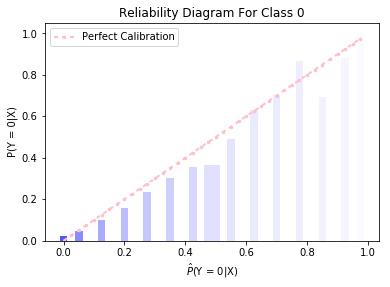

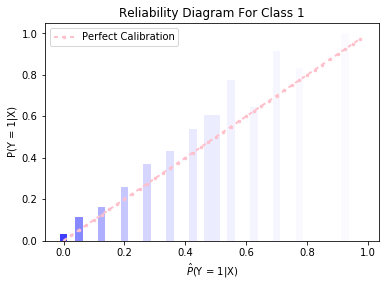

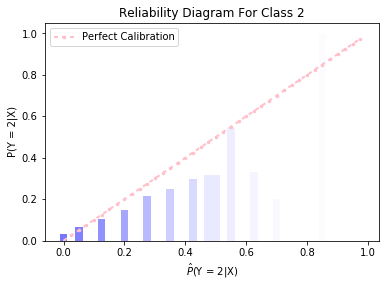

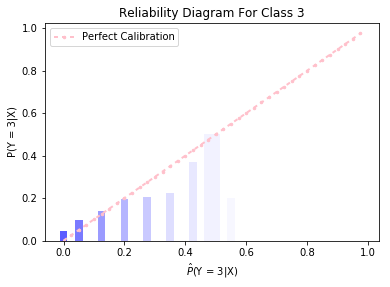

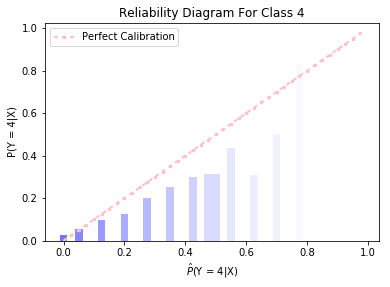

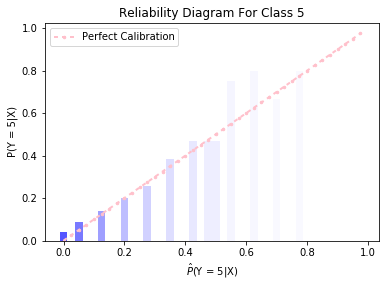

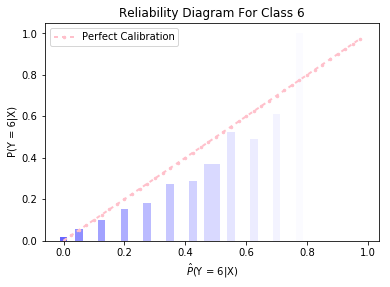

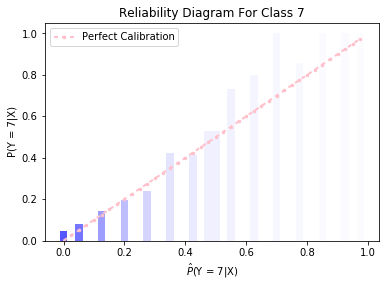

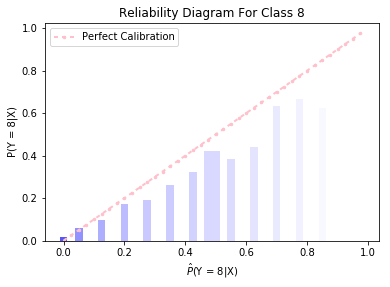

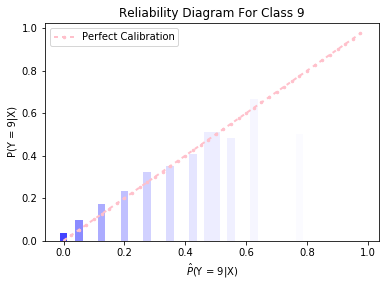

In [2]:
probas = dnn.predict_proba(X_test)

hists_across_classes = []
amts_across_classes = []
for y in np.unique(y_test):
    x = np.arange(0.0, 1, .025)
    hists = []
    amts = []
    for i in range(40):
        prop = i*1./40
        inds = np.where((probas[:, y] >= prop) & (probas[:, y] <= prop+0.025))[0]
        if len(inds) > 0:
            perc = len(np.where(y_test[inds] == y)[0])*1./len(inds)
        else:
            perc = prop
        hists.append(perc)
        amts.append(len(inds))
    hists_across_classes.append(hists)
    amts_across_classes.append(amts)

for y in np.unique(y_test):
    for idx in range(len(x)):
        plt.bar(x[idx], hists_across_classes[y][idx], width = 1/40, alpha = np.sqrt(amts_across_classes[y][idx] / np.sum(amts_across_classes[y])), color = 'b')
    plt.title("Reliability Diagram For Class {}".format(y))
    plt.xlabel("$\hat{P}$(Y = " + str(y) + "|X)")
    plt.ylabel("P(Y = {}|X)".format(y))
    plt.plot(x, x, color = 'pink',linewidth = 2.0, linestyle='--', dashes = (2, 2),label='Perfect Calibration', marker = '.', ms = 5)
    plt.legend()
    plt.show()
